## 데이터 불러오기

In [ ]:
import numpy as np

In [ ]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

print(perch_length.shape, perch_weight.shape)
      

(56,) (56,)


## 훈련 세트와 테스트 세트로 나눈 후, 1차원 -> 2차원 배열로 변환

In [ ]:
from sklearn.model_selection import train_test_split 

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42,), (14,), (42,), (14,))

- 1차원 -> 2차원 배열

In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

train_input.shape, test_input.shape

((42, 1), (14, 1))

## 데이터 시각화 -> 데이터 재가공

- 모델링

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

# 모형훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

- 모델 평가

## 모델 예측
- 서비스를 함

In [ ]:
# 농어의 길이50cm -> 농어의 무게 
print(knr.predict([[50]]))

[1033.33333333]


## 모형 평가를 위한 시각화

In [ ]:
from scipy.spatial import distance
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 3개
distance, indexes = knr.kneighbors([[50]])

print(distance, indexes)

[[6. 7. 7.]] [[34  8 14]]


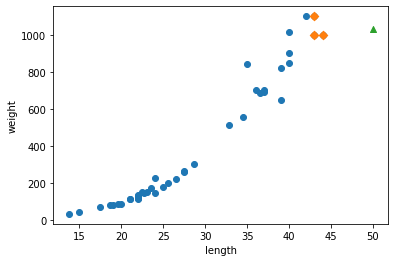

In [ ]:
# 훈련세트의 산점도를 그린다
plt.scatter(train_input, train_target)
# 훈련세트 중에서 이웃 샘플만 다시 그린다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

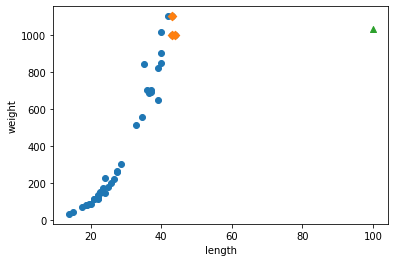

In [ ]:

distance, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker='D')


plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형회귀
- p136


In [ ]:
# Python
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


## 선형회귀의 모형
- 기울기,  절편

In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- 시각화

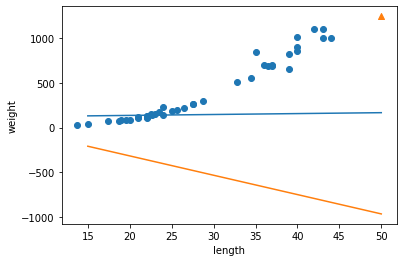

In [ ]:
plt.scatter(train_input, train_target)

# 15에서 50까지 1차방정식 그래프를 그린다 
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터 
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형 회귀
- 다항 회귀
- 농어 1cm = -650g
- 직선의 기울기 대신, 곡선의 기울기를 쓰자
- 직선 = 1차방정식, 곡선 = 2차방정식
- $y = ax^2 + bx + b$
- $무게 = a길이^2 + b길이 + 절편$

In [ ]:
# p140
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

print(train_poly.shape, test_poly.shape)
print(" --------train poly --------")
print(" --------test poy --------")

(42, 2) (14, 2)
 --------train poly --------
 --------test poy --------


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


- 시각화

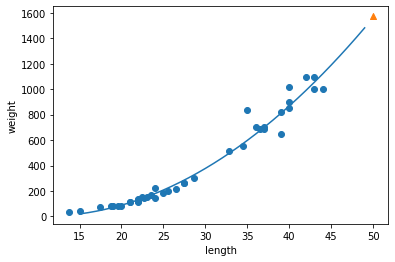

In [ ]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

# 15에서 49까지 2차방정식 그래프를 그린다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()